**Download Bank_loan_Dataset ******

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-loan-modelling/Bank_Personal_Loan_Modelling.xlsx


Lets Begin With Two copies of Dataset __ Or You may go with DeepCopy

In [2]:
A=AA = pd.read_excel('/kaggle/input/bank-loan-modelling/Bank_Personal_Loan_Modelling.xlsx','Data')

In [3]:
AA.shape

(5000, 14)

In [4]:
# Load libraries
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.preprocessing import StandardScaler,LabelEncoder,PowerTransformer,QuantileTransformer
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier,BaggingClassifier,GradientBoostingClassifier,VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
from sklearn.model_selection import train_test_split, cross_val_score,KFold,StratifiedKFold,GridSearchCV,RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# Data Information


In [5]:
A.describe()
# O Null Value 
# ID - 1 to 5000  , drop it 
# Age B/w 23-67, Median at 45
# Experience :min:-3 not possible , So treat all below Zero as 0, Mean & median is same : 20 ( So somewhat Normal Distributed )
# ZIp Code:unique number to be count 25% :about 91k, 50% at 93K and 75% at 94 , Where min is just 9307 might be possible one digit forget to mention
# Family :Family member b/w 1 to 4
# CCAvg:0-10, might be some hint of outlier here , as 75 % at 2.5 , max at 10, std is just 1.74
# Education :1-to 3
# Mortage : Upto 50% data nothing i.e 0, So highly skewed data... transformation required
# Personal Loan :Highly skewed data , upto 75% , 0; 
# Securities:Highly negative data 
# CD Account:Highly negative data , Need treatment 
# Oneline and credit card Highly skewed data , Need treatment 

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [6]:
A.info()
# Column descriptions

##	Data Description:
##
##	ID	Customer ID
##	Age	Customer's age in completed years
##	Experience	#years of professional experience
##	Income	Annual income of the customer ($000)
##	ZIPCode	Home Address ZIP code.
##	Family	Family size of the customer
##	CCAvg	Avg. spending on credit cards per month ($000)
##	Education	Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
##	Mortgage	Value of house mortgage if any. ($000)
##	Personal Loan	Did this customer accept the personal loan offered in the last campaign?
##	Securities Account	Does the customer have a securities account with the bank?
##	CD Account	Does the customer have a certificate of deposit (CD) account with the bank?	
##	Online	Does the customer use internet banking facilities?
##	CreditCard	Does the customer use a credit card issued by UniversalBank?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [7]:
A.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [8]:
A.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

# Bar Graph for Non-missing values

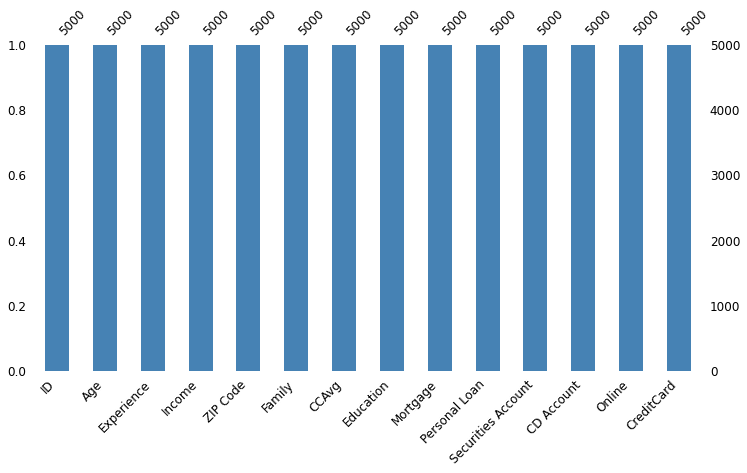

In [9]:
import missingno 
missingno.bar(A,figsize=(12, 6), fontsize=12, color='steelblue')

In [ ]:
A.describe(include=[np.number])

In [10]:
job_unique=A["Personal Loan"].value_counts() # Remember difference between .columns & .columns.values & value_counts()
print("No. of distinct variables are",job_unique.shape[0])
print("-"*90)
print("Unique numbers are \n",job_unique.head(6))

No. of distinct variables are 2
------------------------------------------------------------------------------------------
Unique numbers are 
 0    4520
1     480
Name: Personal Loan, dtype: int64


# Just Draw Bar Garph for Data imbalance

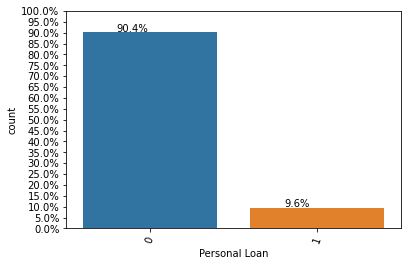

In [11]:
total = len(A)
ax=sns.countplot(A["Personal Loan"])
for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.2, p.get_height()+10)) # p has x, height function in patches 
 
ax.yaxis.set_ticks(np.linspace(0, total, 21))

#adjust the ticklabel to the desired format, without changing the position of the ticks. 
ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total)) # Carry ax, then yaxis, then get_majortick locs()
ax.set_xticklabels(ax.get_xticklabels(),rotation=70)
plt.show()

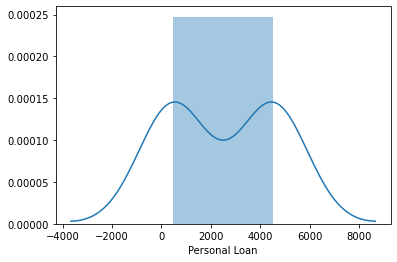

In [12]:
sns.distplot(job_unique)
plt.show()

In [13]:
A_numeric_col=A.select_dtypes(include=np.number)
A_numeric_col

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [14]:
A=A.drop("ID",1)
A.shape

(5000, 13)

In [15]:
A["Securities Account"].value_counts()

0    4478
1     522
Name: Securities Account, dtype: int64

In [16]:
np.argmin(A["ZIP Code"].values)   

384

In [17]:
A.loc[384,"ZIP Code"] # All other values in 90K + 

9307

In [18]:
A=A.drop(384,0)
A.shape

(4999, 13)

In [19]:
Experince_in_negative=np.where(A["Experience"].values<0)
Experince_in_negative
#A.loc[89,"Experience"]

(array([  89,  226,  315,  450,  523,  535,  539,  575,  582,  596,  648,
         669,  685,  792,  888,  908, 1172, 1427, 1521, 1904, 2101, 2429,
        2465, 2544, 2617, 2716, 2847, 2875, 2961, 2979, 3075, 3129, 3156,
        3278, 3283, 3291, 3393, 3424, 3625, 3795, 3823, 3886, 3945, 4014,
        4087, 4115, 4284, 4410, 4480, 4513, 4581, 4956]),)

# Get Linear Relationship for Age And Experiance 

 

In [20]:
import statsmodels.api as sm
from statsmodels.api import add_constant

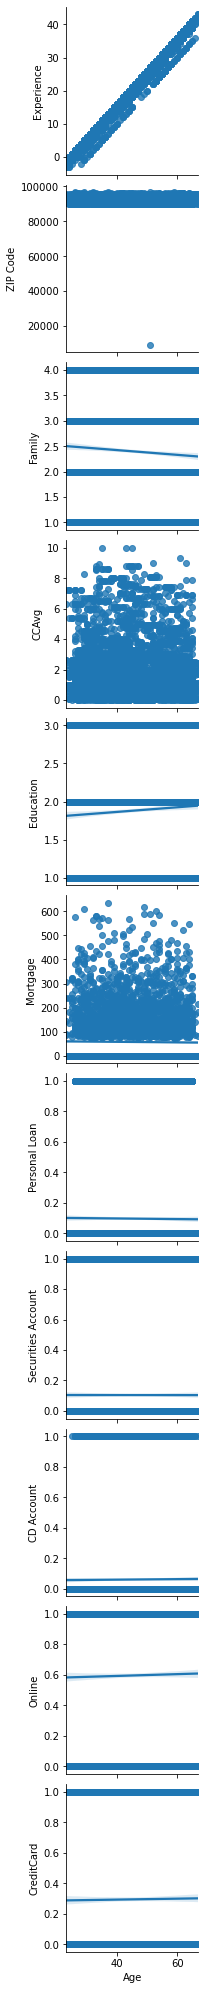

In [21]:
sns.pairplot(AA,x_vars=['Age'],y_vars=[ 'Experience', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],kind="reg") 


In [23]:
# We imputed Wrong values for Exp vs Age , So Improve record as linear regression 
Xc=sm.add_constant(A["Age"])
model = sm.OLS(A["Experience"],Xc).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Experience   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                 4.282e+05
Date:                Mon, 25 Jan 2021   Prob (F-statistic):               0.00
Time:                        15:26:08   Log-Likelihood:                -8135.1
No. Observations:                4999   AIC:                         1.627e+04
Df Residuals:                    4997   BIC:                         1.629e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -24.9905      0.071   -351.559      0.000     -25.130     -24.851
Age            0.9946      0.002    654.334      0.000       0.992       0.998
==============================================================================
Omnibus:                     1723.976   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6633.556
Skew:                          -1.688   Prob(JB):                         0.00
Kurtosis:                       7.523   Cond. No.                         191.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
A["Experience"]=A["Experience"].apply(lambda x:x if x>=0 else np.nan)

In [25]:
A["Experience"]=A.groupby("Age")["Experience"].transform(lambda x: x.fillna(x.mean()))
A["Experience"].isnull().sum()

12

In [26]:
df_age=A.groupby("Age")
df_age.get_group(23)# here replace Exp with 0
df_age.get_group(23).index.tolist()

[670, 909, 2430, 2618, 2717, 2962, 3130, 3157, 3425, 3824, 4285, 4411]

In [27]:
A["Experience"]=A["Experience"].fillna(value=0)

In [28]:
A["Experience"].isnull().sum()

0

# Parametric Test: for Linear Models

# Non Parametric Test for Non Linear Models



 ### T-Test: Parametric test
 ### Shapiro: To check Linearity of variable 
 ### Mannwhitneyu test Non parametric test used to apply when ttest fails, and we are about to reject any variable on the hypothesis we made on the basis on domain
 
 

In [29]:
from scipy.stats import ttest_ind,shapiro,mannwhitneyu

In [30]:
df_1=A[A["Personal Loan"]==1]
df_0=A[A["Personal Loan"]==0]

In [31]:
df_1.shape,A.columns

((480, 13),
 Index(['Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
        'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
        'CD Account', 'Online', 'CreditCard'],
       dtype='object'))

In [32]:
ttest_ind(df_1.Age,df_0.Age)

Ttest_indResult(statistic=-0.5438787146829437, pvalue=0.5865492013305027)

In [33]:
type(A.columns.values)

numpy.ndarray

In [34]:
list_of_columns=A.columns.values.tolist() # list 
list_of_columns.remove('Personal Loan')
list_of_columns

['Age',
 'Experience',
 'Income',
 'ZIP Code',
 'Family',
 'CCAvg',
 'Education',
 'Mortgage',
 'Securities Account',
 'CD Account',
 'Online',
 'CreditCard']

In [35]:
list(map(lambda x,y:ttest_ind(df_0[x],df_1[y]),list_of_columns,list_of_columns)) ##list(map(lambda x,y:x+""+y,list_of_columns,list_of_columns))

[Ttest_indResult(statistic=0.5438787146829437, pvalue=0.5865492013305027),
 Ttest_indResult(statistic=0.5639363005661084, pvalue=0.5728227918527078),
 Ttest_indResult(statistic=-41.080857656233164, pvalue=0.0),
 Ttest_indResult(statistic=0.21046746566118682, pvalue=0.8333114228294203),
 Ttest_indResult(statistic=-4.353570804034554, pvalue=1.3661420911990758e-05),
 Ttest_indResult(statistic=-27.877343866932645, pvalue=4.3209754150826754e-159),
 Ttest_indResult(statistic=-9.764579578733922, pvalue=2.527199077228697e-22),
 Ttest_indResult(statistic=-10.14539375374717, pvalue=5.9194946399388514e-24),
 Ttest_indResult(statistic=-1.5507423558453324, pvalue=0.12102676709681365),
 Ttest_indResult(statistic=-23.572752598163415, pvalue=1.3744156813762077e-116),
 Ttest_indResult(statistic=-0.44760700597636177, pvalue=0.6544562485232068),
 Ttest_indResult(statistic=-0.2052303733026897, pvalue=0.8374004993650523)]

In [36]:
# No need to perform mannwitney test( Non parametric Model )
list(map(lambda x,y:mannwhitneyu(df_0[x],df_1[y]),list_of_columns,list_of_columns))

[MannwhitneyuResult(statistic=1067306.0, pvalue=0.2829559516713347),
 MannwhitneyuResult(statistic=1067423.0, pvalue=0.28427437696842117),
 MannwhitneyuResult(statistic=169085.0, pvalue=5.429478908593923e-204),
 MannwhitneyuResult(statistic=1083949.0, pvalue=0.49189879308685114),
 MannwhitneyuResult(statistic=957480.0, pvalue=6.117921109492483e-06),
 MannwhitneyuResult(statistic=417560.0, pvalue=1.8932276710909096e-109),
 MannwhitneyuResult(statistic=806666.0, pvalue=2.818552695757118e-23),
 MannwhitneyuResult(statistic=974658.5, pvalue=3.868904514764851e-06),
 MannwhitneyuResult(statistic=1059870.0, pvalue=0.06051160823035693),
 MannwhitneyuResult(statistic=807110.0, pvalue=4.3762355085455366e-111),
 MannwhitneyuResult(statistic=1073125.5, pvalue=0.3272125627971223),
 MannwhitneyuResult(statistic=1079691.5, pvalue=0.418696620825196)]

In [37]:
res=[lis[1] for lis in list(map(lambda x,y:mannwhitneyu(df_0[x],df_1[y]),list_of_columns,list_of_columns))]
list(zip(res,A.columns.values.tolist()))
pd.DataFrame(list(zip(res,list_of_columns)),columns=["Pvalue_paired_ttest","Variable"])


,Pvalue_paired_ttest,Variable
0,2.829560e-01,Age
1,2.842744e-01,Experience
2,5.429479e-204,Income
3,4.918988e-01,ZIP Code
4,6.117921e-06,Family
5,1.893228e-109,CCAvg
6,2.818553e-23,Education
7,3.868905e-06,Mortgage
8,6.051161e-02,Securities Account
9,4.376236e-111,CD Account


In [38]:
# just check Distribution of all variable and check skew
pd.DataFrame(list(zip(list(map(lambda x:df_0[x].skew(),list_of_columns)),
                      list(map(lambda x:df_1[x].skew(),list_of_columns)),
                      list_of_columns)),columns=["Df_0","Df_1","Varible"])

,Df_0,Df_1,Varible
0,-0.037871,0.052763,Age
1,-0.021962,0.052652,Experience
2,1.028904,-0.239949,Income
3,-0.294737,-0.310768,ZIP Code
4,0.190146,-0.162116,Family
5,1.863842,0.250653,CCAvg
6,0.301745,-0.413821,Education
7,1.995786,1.453028,Mortgage
8,2.626755,2.274902,Securities Account
9,4.994878,0.919575,CD Account


/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


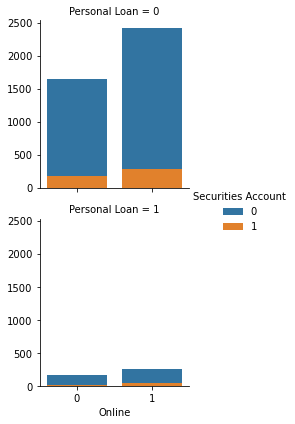

In [39]:
sns.FacetGrid(data=A,hue="Securities Account",row="Personal Loan").map(sns.countplot,"Online").add_legend()

In [40]:
predictor= A.iloc[:,A.columns != 'Personal Loan']
target= A.iloc[:, A.columns == 'Personal Loan']
print("Target rows ", target.shape[0])
print("Target columns", target.shape[1])
print("Predictor rows ", predictor.shape[0])
print("Predictor columns", predictor.shape[1])

Target rows  4999
Target columns 1
Predictor rows  4999
Predictor columns 12


In [41]:
A.corr()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,0.994228,-0.055164,-0.030526,-0.046566,-0.051959,0.041211,-0.012484,-0.007694,-0.000403,0.008068,0.013622,0.007530
Experience,0.994228,1.000000,-0.046771,-0.030435,-0.052357,-0.049947,0.013862,-0.010900,-0.007977,-0.001201,0.009965,0.013699,0.008920
Income,-0.055164,-0.046771,1.000000,-0.030725,-0.157232,0.645940,-0.187277,0.206712,0.502459,-0.002695,0.169703,0.014397,-0.002030
ZIP Code,-0.030526,-0.030435,-0.030725,1.000000,0.027532,-0.012205,-0.008254,0.003608,-0.002977,0.002418,0.021669,0.028328,0.024055
Family,-0.046566,-0.052357,-0.157232,0.027532,1.000000,-0.109098,0.064581,-0.020294,0.061471,0.020094,0.014184,0.010127,0.011160
CCAvg,-0.051959,-0.049947,0.645940,-0.012205,-0.109098,1.000000,-0.135966,0.109834,0.366866,0.015036,0.136507,-0.003495,-0.006451
Education,0.041211,0.013862,-0.187277,-0.008254,0.064581,-0.135966,1.000000,-0.033186,0.136834,-0.010723,0.014004,-0.015227,-0.011432
Mortgage,-0.012484,-0.010900,0.206712,0.003608,-0.020294,0.109834,-0.033186,1.000000,0.142065,-0.005449,0.089286,-0.005904,-0.007061
Personal Loan,-0.007694,-0.007977,0.502459,-0.002977,0.061471,0.366866,0.136834,0.142065,1.000000,0.021932,0.316344,0.006332,0.002903
Securities Account,-0.000403,-0.001201,-0.002695,0.002418,0.020094,0.015036,-0.010723,-0.005449,0.021932,1.000000,0.317023,0.012685,-0.014926


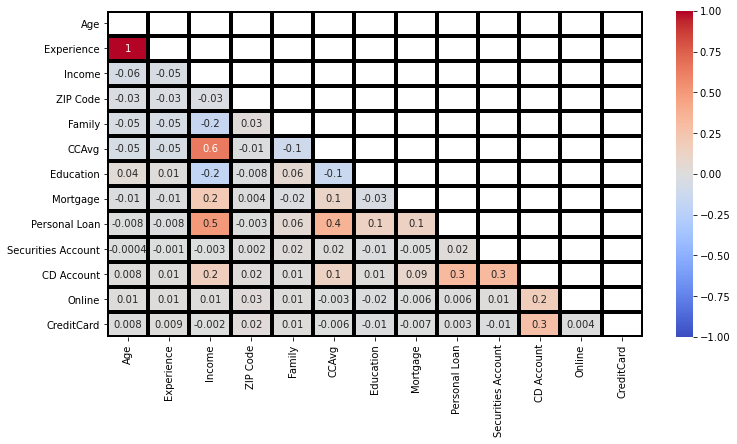

In [42]:
plt.figure(figsize=(12,6))
sns.heatmap(A.corr(),annot=True,fmt=".1g",vmin=-1,vmax=1,center=0,linewidths=3,linecolor="black",cmap="coolwarm",mask=np.triu(A.corr()))

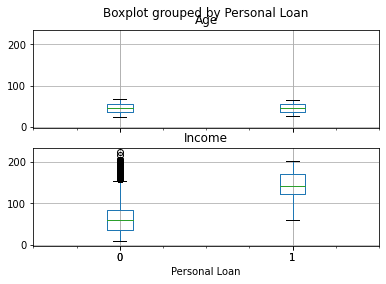

In [43]:

A.boxplot(column=["Age","Income"],by="Personal Loan",layout=(2,1));

In [44]:
sc=StandardScaler()
X_std=sc.fit_transform(predictor)
X_std
X_std_df=pd.DataFrame(X_std)
X_std_df.columns=predictor.columns
X_std_df


,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,-1.774184,-1.672800,-0.538475,-1.172111,1.397827,-0.193516,-1.048893,-0.555597,2.928588,-0.253567,-1.216414,-0.645095
1,-0.029423,-0.098283,-0.864366,-1.750699,0.526321,-0.250738,-1.048893,-0.555597,2.928588,-0.253567,-1.216414,-0.645095
2,-0.552851,-0.448175,-1.364065,0.881367,-1.216692,-0.536851,-1.048893,-0.555597,-0.341461,-0.253567,-1.216414,-0.645095
3,-0.901803,-0.973014,0.569554,0.535805,-1.216692,0.435932,0.141980,-0.555597,-0.341461,-0.253567,-1.216414,-0.645095
4,-0.901803,-1.060487,-0.625379,-1.045367,1.397827,-0.536851,0.141980,-0.555597,-0.341461,-0.253567,-1.216414,1.550160
...,...,...,...,...,...,...,...,...,...,...,...,...
4994,-1.425232,-1.497853,-0.734010,-0.268422,-1.216692,-0.021848,1.332854,-0.555597,-0.341461,-0.253567,0.822089,-0.645095
4995,-1.337994,-1.410380,-1.277161,-0.643538,1.397827,-0.880186,-1.048893,0.280107,-0.341461,-0.253567,0.822089,-0.645095
4996,1.540863,1.651180,-1.081627,-0.083137,-0.345185,-0.937408,1.332854,-0.555597,-0.341461,-0.253567,-1.216414,-0.645095
4997,1.715339,1.738654,-0.538475,-1.781959,0.526321,-0.822963,0.141980,-0.555597,-0.341461,-0.253567,0.822089,-0.645095


In [45]:

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X_std_df,target,test_size=0.4,random_state=0)
LR=LogisticRegression()


In [46]:
LR.fit(xtrain,ytrain)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [ ]:
LR.coef_

In [ ]:
LR.intercept_

In [ ]:
y_prob=LR.predict_proba(xtest)
y_prob[:10]

In [ ]:
y_class=LR.predict(xtest)
y_class[:10]

In [ ]:
cm=metrics.confusion_matrix(ytest,y_class)
print(cm)

In [65]:
# If PowerTransformer used in place for StandardScaler
pt=PowerTransformer()
X_std_pt=pt.fit_transform(predictor)
X_std_pt
X_std_pt=pd.DataFrame(X_std_pt)
X_std_pt.columns=predictor.columns
X_std_pt

qt=QuantileTransformer()
X_std_qt=qt.fit_transform(predictor)
X_std_qt
X_std_qt=pd.DataFrame(X_std_qt)
X_std_qt.columns=predictor.columns
X_std_qt

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,0.013013,0.030030,0.368368,0.153654,1.000000,0.513013,0.00000,0.000000,1.0,0.0,0.0,0.0
1,0.491491,0.465465,0.210711,0.056056,0.654655,0.484985,0.00000,0.000000,1.0,0.0,0.0,0.0
2,0.333834,0.361862,0.017017,0.793794,0.000000,0.359860,0.00000,0.000000,0.0,0.0,0.0,0.0
3,0.239740,0.219219,0.756256,0.604104,0.000000,0.780781,0.55956,0.000000,0.0,0.0,0.0,0.0
4,0.239740,0.192693,0.347347,0.186186,1.000000,0.359860,0.55956,0.000000,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4994,0.085085,0.067568,0.270270,0.420921,0.000000,0.601602,1.00000,0.000000,0.0,0.0,1.0,0.0
4995,0.111111,0.092593,0.041542,0.275275,1.000000,0.164665,0.00000,0.714715,0.0,0.0,1.0,0.0
4996,0.950450,0.969469,0.116617,0.458959,0.424424,0.122623,1.00000,0.000000,0.0,0.0,0.0,0.0
4997,0.984985,0.983984,0.368368,0.028529,0.654655,0.198699,0.55956,0.000000,0.0,0.0,1.0,0.0


In [ ]:
xtrain1,xtest1,ytrain1,ytest1=train_test_split(X_std_pt,target,test_size=0.4,random_state=0)
xtrain2,xtest2,ytrain2,ytest2=train_test_split(X_std_qt,target,test_size=0.4,random_state=0)


In [ ]:
LR1=LogisticRegression()
LR1.fit(xtrain1,ytrain1)
y_class1=LR1.predict(xtest1)
cm=metrics.confusion_matrix(ytest1,y_class1)
print(cm)


In [ ]:
LR2=LogisticRegression()
LR2.fit(xtrain2,ytrain2)
y_class2=LR1.predict(xtest2)
cm=metrics.confusion_matrix(ytest2,y_class2)
print(cm)

In [ ]:
pca1=PCA(n_components=0.99)
pca2=PCA(n_components=0.99)

X_std_pt_PCA=pca1.fit_transform(X_std_pt)
X_std_pt_PCA
X_std_pt_PCA=pd.DataFrame(X_std_pt_PCA,columns=["PC"+str(i) for i in range(0,len(pca1.explained_variance_),1)])
X_std_pt_PCA



In [ ]:
X_std_qt_PCA=pca2.fit_transform(X_std_qt)
X_std_qt_PCA
X_std_qt_PCA=pd.DataFrame(X_std_qt_PCA,columns=["PC"+str(i) for i in range(0,len(pca2.explained_variance_),1)])
X_std_qt_PCA

In [ ]:
xtrain3,xtest3,ytrain3,ytest3=train_test_split(X_std_pt_PCA,target,test_size=0.4,random_state=0)
xtrain4,xtest4,ytrain4,ytest4=train_test_split(X_std_qt_PCA,target,test_size=0.4,random_state=0)


In [ ]:
LR3=LogisticRegression()
LR3.fit(xtrain3,ytrain3)
y_class3=LR3.predict(xtest3)
cm=metrics.confusion_matrix(ytest3,y_class3)
print(cm)

In [ ]:
LR4=LogisticRegression()
LR4.fit(xtrain4,ytrain4)
y_class4=LR4.predict(xtest4)
cm=metrics.confusion_matrix(ytest4,y_class4)
print(cm)

In [ ]:

from sklearn.calibration import CalibratedClassifierCV
sig=CalibratedClassifierCV()
lr=LogisticRegression(class_weight="balanced")
lr.fit(xtrain1,ytrain1)
sig=CalibratedClassifierCV(lr,method="sigmoid")
sig.fit(xtrain1,ytrain1)
predicted_y=sig.predict(xtest1)
cm=metrics.confusion_matrix(ytest1,predicted_y)
print(cm)

In [ ]:
import xgboost as xgb

In [ ]:
model2 = xgb.XGBClassifier(n_estimators=150, max_depth=8, learning_rate=0.1, subsample=0.5)
train_model2 = model2.fit(xtrain1,ytrain1)
predicted_y=train_model2.predict(xtest1)
cm=metrics.confusion_matrix(ytest1,predicted_y)
print(cm)

In [ ]:
metrics.accuracy_score(ytest1,predicted_y)

In [ ]:
print(metrics.classification_report(ytest1, predicted_y,
                            digits = 4,
                            target_names=["Not Loan Customer",
                                          "Loan Customer"]))

In [ ]:
dt=DecisionTreeClassifier()
paramgrid={"criterion":["gini","entropy"],"max_depth":np.arange(1,15,1)}
skf=StratifiedKFold(shuffle=True,n_splits=5,random_state=32)
gd=GridSearchCV(estimator=dt,param_grid=paramgrid,cv=skf)

In [ ]:
gd.fit(xtrain1,ytrain)
gd.best_params_

In [ ]:
dt=DecisionTreeClassifier(criterion= "entropy", max_depth= 4)
skf1=StratifiedKFold(shuffle=True,n_splits=5,random_state=32)
dt.fit(xtrain1,ytrain)
ypredict=dt.predict(xtest1)
cm=metrics.confusion_matrix(ytest1,ypredict)
cm

In [ ]:
dt2=DecisionTreeClassifier(criterion= "entropy", max_depth= 4)
ScoreDtCv=cross_val_score(dt2,xtrain1,ytrain1,cv=skf1,scoring="roc_auc")
print(np.mean(ScoreDtCv))
print(np.std(ScoreDtCv))

In [ ]:
rf=RandomForestClassifier()
bootstrap = [True, False]
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 500, num = 50)]
param_grid={"criterion":['gini',"entropy"],
           "n_estimators":n_estimators,
          
           "bootstrap":bootstrap,
           
            "max_features" : ['auto', 'sqrt']
           }
           
           
rs=RandomizedSearchCV(estimator=rf,param_distributions=param_grid,
                      n_iter = 100, cv = 3,random_state=42,
                      n_jobs=-1,verbose=2) 
rs.fit(xtrain1,ytrain1)
rs.best_params_


           

In [ ]:
rf=RandomForestClassifier(n_estimators= 225,max_features= "auto",
 criterion= "entropy",
 bootstrap= False)
sk=StratifiedKFold(shuffle=True,random_state=42,n_splits=5)
score=cross_val_score(rf,xtrain1,ytrain1,cv=sk,scoring="roc_auc")
print(np.mean(score))
print(np.std(score))

In [ ]:
rf.fit(xtrain1,ytrain1)
ypred=rf.predict(xtest1)
cm=metrics.confusion_matrix(ytest1,ypred)
cm

In [ ]:
ascore=metrics.accuracy_score(ytest1,ypred)
ascore

In [ ]:
AB_be=[]
for i in np.arange(1,15):
  AB=AdaBoostClassifier(base_estimator=rf,n_estimators=i,random_state=0)
  kfold = KFold(shuffle=True,n_splits=5,random_state=0)
  mse=cross_val_score(AB,xtrain1,ytrain1.values.ravel(),cv=kfold,scoring='roc_auc')
  rmse=np.sqrt(np.abs(mse))
  AB_be.append(np.mean(rmse))

In [ ]:
yt=ytest1
yt.shape
X_std_pt.shape

In [47]:
from keras.layers import Dense, Flatten ,Dropout,BatchNormalization
from keras.models import Sequential

In [48]:
modelz=Sequential()
modelz.add(Dense(16,input_dim=12,activation="relu"))


In [49]:
modelz.add(Dense(8,activation="relu"))
modelz.add(Dense(1,activation="sigmoid"))

In [70]:
modelz.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])
#model.fit(X_std_pt,target,epochs=10,batch_size=32)

In [61]:
modelz.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                416       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 1,089
Trainable params: 1,089
Non-trainable params: 0
_________________________________________________________________


In [57]:
predictor.shape

(4999, 12)

In [67]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

 


In [76]:
modelz.fit(predictor,target,epochs=250,batch_size=16)

Epoch 1/250
313/313 [==============================] - 0s 1ms/step - loss: 9220.4971 - accuracy: 0.8706
Epoch 2/250
313/313 [==============================] - 0s 1ms/step - loss: 260.6710 - accuracy: 0.8806
Epoch 3/250
313/313 [==============================] - 0s 1ms/step - loss: 208.9003 - accuracy: 0.8916
Epoch 4/250
313/313 [==============================] - 0s 1ms/step - loss: 169.8221 - accuracy: 0.8886
Epoch 5/250
313/313 [==============================] - 0s 1ms/step - loss: 159.8696 - accuracy: 0.8976
Epoch 6/250
313/313 [==============================] - 0s 1ms/step - loss: 155.7219 - accuracy: 0.8932
Epoch 7/250
313/313 [==============================] - 0s 1ms/step - loss: 151.5645 - accuracy: 0.8922
Epoch 8/250
313/313 [==============================] - 0s 1ms/step - loss: 218.2818 - accuracy: 0.8802
Epoch 9/250
313/313 [==============================] - 0s 1ms/step - loss: 131.5152 - accuracy: 0.8978
Epoch 10/250
313/313 [==============================] - 0s 1ms/step - lo

Epoch 80/250
313/313 [==============================] - 0s 1ms/step - loss: 67.8169 - accuracy: 0.8870
Epoch 81/250
313/313 [==============================] - 0s 1ms/step - loss: 32.6125 - accuracy: 0.9028
Epoch 82/250
313/313 [==============================] - 0s 1ms/step - loss: 45.2289 - accuracy: 0.8968
Epoch 83/250
313/313 [==============================] - 0s 1ms/step - loss: 40.4847 - accuracy: 0.8944
Epoch 84/250
313/313 [==============================] - 0s 1ms/step - loss: 54.8598 - accuracy: 0.8912
Epoch 85/250
313/313 [==============================] - 0s 1ms/step - loss: 40.2877 - accuracy: 0.8954
Epoch 86/250
313/313 [==============================] - 0s 1ms/step - loss: 64.4128 - accuracy: 0.8862
Epoch 87/250
313/313 [==============================] - 0s 1ms/step - loss: 58.4639 - accuracy: 0.8904
Epoch 88/250
313/313 [==============================] - 0s 1ms/step - loss: 55.9291 - accuracy: 0.8860
Epoch 89/250
313/313 [==============================] - 0s 1ms/step - los

Epoch 159/250
313/313 [==============================] - 0s 1ms/step - loss: 20.6618 - accuracy: 0.9020
Epoch 160/250
313/313 [==============================] - 0s 1ms/step - loss: 24.6403 - accuracy: 0.8990
Epoch 161/250
313/313 [==============================] - 0s 1ms/step - loss: 20.6551 - accuracy: 0.9030
Epoch 162/250
313/313 [==============================] - 0s 1ms/step - loss: 23.4633 - accuracy: 0.8984
Epoch 163/250
313/313 [==============================] - 0s 1ms/step - loss: 27.0548 - accuracy: 0.8930
Epoch 164/250
313/313 [==============================] - 0s 1ms/step - loss: 29.3716 - accuracy: 0.8894
Epoch 165/250
313/313 [==============================] - 0s 1ms/step - loss: 25.9401 - accuracy: 0.8862
Epoch 166/250
313/313 [==============================] - 0s 1ms/step - loss: 27.4859 - accuracy: 0.8924
Epoch 167/250
313/313 [==============================] - 0s 1ms/step - loss: 22.8686 - accuracy: 0.8862
Epoch 168/250
313/313 [==============================] - 0s 1ms/

313/313 [==============================] - 0s 1ms/step - loss: 5.3326 - accuracy: 0.8934
Epoch 239/250
313/313 [==============================] - 0s 1ms/step - loss: 2.8440 - accuracy: 0.9054
Epoch 240/250
313/313 [==============================] - 0s 1ms/step - loss: 5.9003 - accuracy: 0.8830
Epoch 241/250
313/313 [==============================] - 0s 1ms/step - loss: 4.7326 - accuracy: 0.8942
Epoch 242/250
313/313 [==============================] - 0s 1ms/step - loss: 4.3770 - accuracy: 0.8910
Epoch 243/250
313/313 [==============================] - 0s 1ms/step - loss: 7.5032 - accuracy: 0.8886
Epoch 244/250
313/313 [==============================] - 0s 1ms/step - loss: 3.2499 - accuracy: 0.8976
Epoch 245/250
313/313 [==============================] - 0s 1ms/step - loss: 3.5655 - accuracy: 0.8972
Epoch 246/250
313/313 [==============================] - 0s 1ms/step - loss: 2.5919 - accuracy: 0.9002
Epoch 247/250
313/313 [==============================] - 0s 1ms/step - loss: 7.7896 - a

In [75]:
#modelz.fit(X_std_qt,target,epochs=150,batch_size=32)
modelz.fit(X_std_qt,target,epochs=250,batch_size=16)

Epoch 1/250
313/313 [==============================] - 0s 1ms/step - loss: 0.1502 - accuracy: 0.9430
Epoch 2/250
313/313 [==============================] - 0s 1ms/step - loss: 0.0925 - accuracy: 0.9668
Epoch 3/250
313/313 [==============================] - 0s 1ms/step - loss: 0.0781 - accuracy: 0.9716
Epoch 4/250
313/313 [==============================] - 0s 1ms/step - loss: 0.0816 - accuracy: 0.9692
Epoch 5/250
313/313 [==============================] - 0s 1ms/step - loss: 0.0729 - accuracy: 0.9754
Epoch 6/250
313/313 [==============================] - 0s 1ms/step - loss: 0.0743 - accuracy: 0.9726
Epoch 7/250
313/313 [==============================] - 0s 1ms/step - loss: 0.0735 - accuracy: 0.9742
Epoch 8/250
313/313 [==============================] - 0s 1ms/step - loss: 0.0704 - accuracy: 0.9748
Epoch 9/250
313/313 [==============================] - 0s 1ms/step - loss: 0.0677 - accuracy: 0.9758
Epoch 10/250
313/313 [==============================] - 0s 1ms/step - loss: 0.0703 - accura

313/313 [==============================] - 0s 1ms/step - loss: 0.0519 - accuracy: 0.9830
Epoch 82/250
313/313 [==============================] - 0s 1ms/step - loss: 0.0535 - accuracy: 0.9810
Epoch 83/250
313/313 [==============================] - 0s 1ms/step - loss: 0.0536 - accuracy: 0.9806
Epoch 84/250
313/313 [==============================] - 0s 1ms/step - loss: 0.0529 - accuracy: 0.9794
Epoch 85/250
313/313 [==============================] - 0s 1ms/step - loss: 0.0518 - accuracy: 0.9808
Epoch 86/250
313/313 [==============================] - 0s 1ms/step - loss: 0.0529 - accuracy: 0.9830
Epoch 87/250
313/313 [==============================] - 0s 1ms/step - loss: 0.0505 - accuracy: 0.9824
Epoch 88/250
313/313 [==============================] - 0s 1ms/step - loss: 0.0516 - accuracy: 0.9826
Epoch 89/250
313/313 [==============================] - 0s 1ms/step - loss: 0.0540 - accuracy: 0.9800
Epoch 90/250
313/313 [==============================] - 0s 1ms/step - loss: 0.0523 - accuracy: 

313/313 [==============================] - 0s 1ms/step - loss: 0.0394 - accuracy: 0.9840
Epoch 161/250
313/313 [==============================] - 0s 1ms/step - loss: 0.0386 - accuracy: 0.9854
Epoch 162/250
313/313 [==============================] - 0s 1ms/step - loss: 0.0400 - accuracy: 0.9828
Epoch 163/250
313/313 [==============================] - 0s 1ms/step - loss: 0.0385 - accuracy: 0.9860
Epoch 164/250
313/313 [==============================] - 0s 1ms/step - loss: 0.0390 - accuracy: 0.9848
Epoch 165/250
313/313 [==============================] - 0s 1ms/step - loss: 0.0380 - accuracy: 0.9840
Epoch 166/250
313/313 [==============================] - 0s 1ms/step - loss: 0.0396 - accuracy: 0.9846
Epoch 167/250
313/313 [==============================] - 0s 1ms/step - loss: 0.0385 - accuracy: 0.9858
Epoch 168/250
313/313 [==============================] - 0s 1ms/step - loss: 0.0382 - accuracy: 0.9848
Epoch 169/250
313/313 [==============================] - 0s 1ms/step - loss: 0.0386 - a

313/313 [==============================] - 0s 1ms/step - loss: 0.0325 - accuracy: 0.9878
Epoch 240/250
313/313 [==============================] - 0s 1ms/step - loss: 0.0308 - accuracy: 0.9874
Epoch 241/250
313/313 [==============================] - 0s 1ms/step - loss: 0.0304 - accuracy: 0.9882
Epoch 242/250
313/313 [==============================] - 0s 1ms/step - loss: 0.0343 - accuracy: 0.9860
Epoch 243/250
313/313 [==============================] - 0s 1ms/step - loss: 0.0336 - accuracy: 0.9886
Epoch 244/250
313/313 [==============================] - 0s 1ms/step - loss: 0.0302 - accuracy: 0.9892
Epoch 245/250
313/313 [==============================] - 0s 1ms/step - loss: 0.0313 - accuracy: 0.9862
Epoch 246/250
313/313 [==============================] - 0s 1ms/step - loss: 0.0377 - accuracy: 0.9864
Epoch 247/250
313/313 [==============================] - 0s 1ms/step - loss: 0.0302 - accuracy: 0.9878
Epoch 248/250
313/313 [==============================] - 0s 1ms/step - loss: 0.0277 - a